# Make Box and Wisker Plots for ML Efficacy Metrics Display in Experiment I

In [43]:
import sys
import os
# Tricks for loading data and libraries from parent directories. 
parent = os.path.abspath("..")
sys.path.insert(1, parent)
print(sys.path)

import pandas as pd

# Custom styles and sizing for matplotlib.
import matplotlib.pyplot as plt
plt.style.use("tex.mplstyle")
from plotting_utils import set_size



['/home/ajo/gitRepos/master_thesis/plotting', '/home/ajo/gitRepos/master_thesis', '/home/ajo/gitRepos/master_thesis', '/home/ajo/gitRepos/master_thesis', '/home/ajo/gitRepos/master_thesis', '/home/ajo/anaconda3/envs/master/lib/python38.zip', '/home/ajo/anaconda3/envs/master/lib/python3.8', '/home/ajo/anaconda3/envs/master/lib/python3.8/lib-dynload', '', '/home/ajo/.local/lib/python3.8/site-packages', '/home/ajo/anaconda3/envs/master/lib/python3.8/site-packages']


In [44]:
data_code = "AD"
if data_code == "AD":
    df = pd.read_csv("../ML_efficacy_catBoost_AD.csv") 
    columns_include_F1 = ["F1_real", "F1_tabddpm_joint" ,"F1_tabddpm", "F1_tvae", "F1_mcce"]
    columns_include_AUC = ["AUC_real", "AUC_tabddpm_joint" ,"AUC_tabddpm", "AUC_tvae", "AUC_mcce"]
    columns_include_acc = ["acc_real", "acc_tabddpm_joint" ,"acc_tabddpm", "acc_tvae", "acc_mcce"]
    ticklabels = [r"\textit{Real}", "TabDiffJoint", "TabDiffCond", "TVAE", "MCCE"]
    ticklables_AUC = ticklabels
elif data_code == "CH":
    df = pd.read_csv("../ML_efficacy_catBoost_CH.csv") 
    columns_include_F1 = ["F1_real", "F1_tabddpm_joint", "F1_tvae", "F1_mcce"] # Don't inlude Conditional modelling.
    columns_include_AUC = ["AUC_real", "AUC_tabddpm_joint", "AUC_tabddpm", "AUC_tvae", "AUC_mcce"]
    columns_include_acc = ["acc_real", "acc_tabddpm_joint", "acc_tvae", "acc_mcce"]# Don't inlude Conditional modelling.
    ticklabels = [r"\textit{Real}", "TabDiffJoint", "TVAE", "MCCE"]
    ticklables_AUC = [r"\textit{Real}", "TabDiffJoint", "TabDiffCond", "TVAE", "MCCE"]
elif data_code == "DI":
    df = pd.read_csv("../ML_efficacy_catBoost_DI.csv")
    columns_include_F1 = ["F1_real", "F1_tabddpm_joint" ,"F1_tabddpm", "F1_tvae", "F1_mcce"]
    columns_include_AUC = ["AUC_real", "AUC_tabddpm_joint" ,"AUC_tabddpm", "AUC_tvae", "AUC_mcce"]
    columns_include_acc = ["acc_real", "acc_tabddpm_joint" ,"acc_tabddpm", "acc_tvae", "acc_mcce"]
    ticklabels = [r"\textit{Real}", "TabDiffJoint", "TabDiffCond", "TVAE", "MCCE"]
    ticklables_AUC = ticklabels

print(df)

   seed   F1_real  F1_tabddpm  F1_tabddpm_joint   F1_mcce   F1_tvae  AUC_real  \
0  1234  0.920653    0.000000          0.902305  0.905793  0.907085  0.862968   
1  4500  0.918856    0.002430          0.901503  0.912178  0.902123  0.863802   
2  2018  0.917976    0.004854          0.894065  0.911748  0.903607  0.863597   
3  1999  0.919674    0.000000          0.902305  0.912507  0.907801  0.863590   
4  2023  0.922449    0.000000          0.902801  0.916129  0.917769  0.862421   

   AUC_tabddpm  AUC_tabddpm_joint  AUC_mcce  AUC_tvae  acc_real  acc_tabddpm  \
0     0.719990           0.706143  0.827346  0.789449     0.864        0.178   
1     0.720748           0.718814  0.823218  0.802742     0.861        0.179   
2     0.722088           0.745284  0.827702  0.797015     0.859        0.180   
3     0.718964           0.718035  0.832588  0.819261     0.862        0.178   
4     0.717577           0.792620  0.836204  0.806159     0.867        0.178   

   acc_tabddpm_joint  acc_mcce  

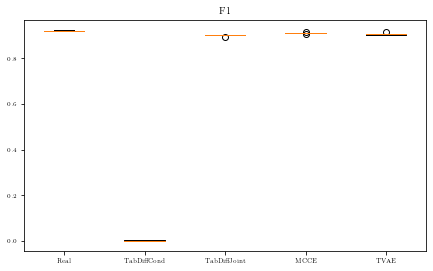

In [45]:
# Make boxplot for F1
fig, axes = plt.subplots(1,1, figsize = set_size(subplots = (1,1)))
axes.boxplot(df.iloc[:,1:6], vert = True)
#axes.set_ylim([0,1])
axes.xaxis.set_ticklabels(["Real", "TabDiffCond", "TabDiffJoint", "MCCE", "TVAE"])
axes.title.set_text("F1")
plt.show()

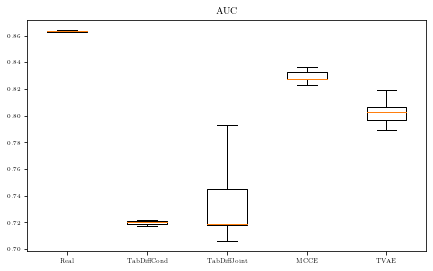

In [46]:
# Make boxplot for AUC
fig, axes = plt.subplots(1,1, figsize = set_size(subplots = (1,1)))
axes.boxplot(df.iloc[:,6:11], vert = True, whis = 1000)
axes.xaxis.set_ticklabels(["Real", "TabDiffCond", "TabDiffJoint", "MCCE", "TVAE"])
axes.title.set_text("AUC")
plt.show()

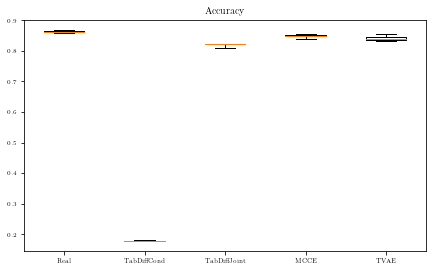

In [47]:
# Make boxplot for Accuracy
fig, axes = plt.subplots(1,1, figsize = set_size(subplots = (1,1)))
axes.boxplot(df.iloc[:,11:], vert = True, whis = 100000)
axes.xaxis.set_ticklabels(["Real", "TabDiffCond", "TabDiffJoint", "MCCE", "TVAE"])
axes.title.set_text("Accuracy")
plt.show()

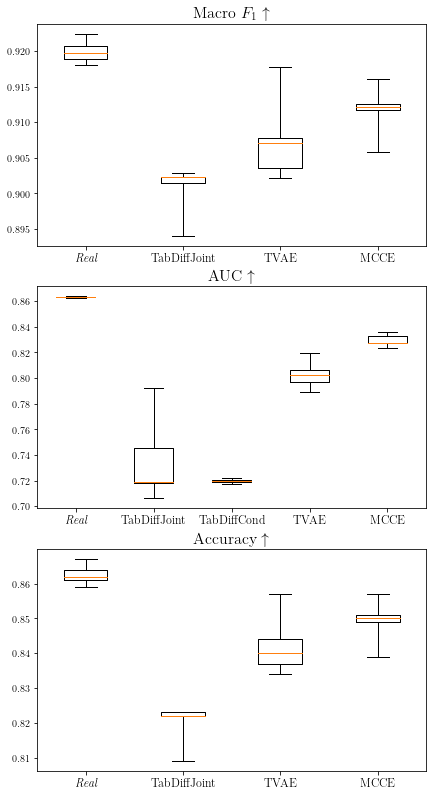

In [48]:
# ALL at once
import matplotlib as mpl
# Change some of the parameters manually here, to make plots slightly more visible in master.
mpl.rcParams["axes.titlesize"] = 16
mpl.rcParams["xtick.labelsize"] = 12
mpl.rcParams["ytick.labelsize"] = 10
fig, axes = plt.subplots(3,1, figsize = set_size(subplots = (3,1)))

# We set "whis" to an unreasonably large value to force the whiskers to show the min and max values.
axes[0].boxplot(df.loc[:,columns_include_F1], vert = True, whis = 100000)
axes[0].xaxis.set_ticklabels(ticklabels)
axes[0].title.set_text("Macro " + r"$F_1 \uparrow$")

axes[1].boxplot(df.loc[:,columns_include_AUC], vert = True, whis = 100000)
axes[1].xaxis.set_ticklabels(ticklables_AUC)
axes[1].title.set_text("AUC "+r"$ \uparrow$")

axes[2].boxplot(df.loc[:, columns_include_acc], vert = True, whis = 100000000)
axes[2].xaxis.set_ticklabels(ticklabels)
axes[2].title.set_text("Accuracy "+r"$ \uparrow$")
plt.savefig("../plots/box_and_whisker_ML_efficacy_"+data_code+".pdf", format="pdf", bbox_inches = "tight")

In [49]:
print(df)

   seed   F1_real  F1_tabddpm  F1_tabddpm_joint   F1_mcce   F1_tvae  AUC_real  \
0  1234  0.920653    0.000000          0.902305  0.905793  0.907085  0.862968   
1  4500  0.918856    0.002430          0.901503  0.912178  0.902123  0.863802   
2  2018  0.917976    0.004854          0.894065  0.911748  0.903607  0.863597   
3  1999  0.919674    0.000000          0.902305  0.912507  0.907801  0.863590   
4  2023  0.922449    0.000000          0.902801  0.916129  0.917769  0.862421   

   AUC_tabddpm  AUC_tabddpm_joint  AUC_mcce  AUC_tvae  acc_real  acc_tabddpm  \
0     0.719990           0.706143  0.827346  0.789449     0.864        0.178   
1     0.720748           0.718814  0.823218  0.802742     0.861        0.179   
2     0.722088           0.745284  0.827702  0.797015     0.859        0.180   
3     0.718964           0.718035  0.832588  0.819261     0.862        0.178   
4     0.717577           0.792620  0.836204  0.806159     0.867        0.178   

   acc_tabddpm_joint  acc_mcce  